In [ ]:
import numpy as np

# Basics


In [ ]:
# NumPy arange() is one of the array creation routines based on numerical ranges.
# It creates an instance of ndarray with evenly spaced values and returns the reference to it.
a = np.arange(6)

In [ ]:
a

In [ ]:
a.shape

In [ ]:
a2 = a[np.newaxis, :]

In [ ]:
a2

In [ ]:
a2.shape

In [ ]:
a

NumPy arrays have a fixed size at creation, unlike Python lists (which can grow dynamically). Changing the size of an ndarray will create a new array and delete the original.

In [ ]:
# Create a NumPy array
original_array = np.array([1, 2, 3, 4, 5])

# Attempt to resize the array (this will create a new array)
new_array = np.resize(original_array, (3, 2))

# Print the original and new arrays
print("Original array:",original_array)

print("\nResized array:\n", new_array)


The elements in a NumPy array are all required to be of the same data type, and thus will be the same size in memory.

 The exception: one can have arrays of (Python, including NumPy) objects, thereby allowing for arrays of different sized elements" refers to the fact that NumPy arrays are homogeneous, meaning all elements must be of the same data type, unless the data type is object.

In [ ]:
#Homogeneous Numeric Array
numeric_array = np.array([1, 2, 3, 4, 5])
numeric_array,numeric_array.dtype

In [ ]:
#Homogeneous Floating-Point Array
float_array = np.array([1.0, 2.5, 3.7, 4.2, 5.1])
float_array,float_array.dtype

In [ ]:
object_array = np.array([1, 2.5, 'three', [4, 5]])
object_array.dtype

The warning you're seeing, VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences..., indicates that you're creating a NumPy array from nested sequences (lists or tuples), and these nested sequences have different lengths. This situation is considered "ragged," and it's deprecated because it can lead to unexpected behavior and potential issues.

To resolve this warning, the suggested action is to explicitly specify the dtype parameter as object when creating the NumPy array. This allows the array to be of the object data type, meaning it can contain elements of different types and sizes.

In [ ]:
import numpy as np

# Creating a ragged nested list
ragged_list = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]

# Attempting to create a NumPy array from the ragged list without specifying dtype
# This will trigger a VisibleDeprecationWarning
array_without_dtype = np.array(ragged_list)

# Creating a NumPy array with dtype=object to avoid the warning
array_with_object_dtype = np.array(ragged_list, dtype=object)

# Print the original list and both arrays
print("Original ragged list:", ragged_list)
print("\nArray without dtype:", array_without_dtype)
print("\nArray with object dtype:", array_with_object_dtype)


In this example, ragged_list is a nested list with sublists of different lengths. The attempt to create a NumPy array without specifying dtype triggers the deprecation warning. The solution is to explicitly set dtype=object when creating the array to handle the different lengths of the sublists.

Keep in mind that using dtype=object might impact the performance of certain NumPy operations since it treats each element as a generic Python object. If possible, it's generally recommended to work with homogeneous arrays for better performance.

In [ ]:
#Heterogeneous Object Array
# Create an array of Python objects
object_array = np.array([1, 'two', [3, 4], {'key': 5}])

# Print the array and its data type
print("Array of Python objects:",object_array)
print("Data type:", object_array.dtype)

# Access individual elements
print("\nIndividual elements:")
print("Element 1:", object_array[0])
print("Element 2:", object_array[1])
print("Element 3:", object_array[2])
print("Element 4:", object_array[3])


In [ ]:
mixed_array = np.array([1, 2.5, True, 'four'], dtype=object)
print("Mixed array:", mixed_array)
print(mixed_array.dtype)


In [ ]:
mixed_array = np.array([1, 2.5, True, 'four'])
print("Mixed array:", mixed_array)
print(mixed_array.dtype)


# Vectorized Code



Vectorized code refers to a style of writing code that takes advantage of vector operations, allowing operations to be performed on entire arrays or large chunks of data at once, without the need for explicit looping. This is particularly relevant in numerical and scientific computing, where arrays of data are common.

In Python, the NumPy library provides a convenient and efficient way to write vectorized code. NumPy operations are designed to work element-wise on entire arrays, and this is accomplished by avoiding explicit loops and instead relying on optimized C and Fortran code behind the scenes.

In [ ]:
#element wise operations
import numpy as np

# Using loops
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])
result = np.empty_like(arr1)

for i in range(len(arr1)):
    result[i] = arr1[i] + arr2[i]

print("Using loops:", result)

# Using vectorized code
result_vectorized = arr1 + arr2
print("Vectorized code:", result_vectorized)
#In this example, both arrays arr1 and arr2 are added element-wise.
# The loop-based approach explicitly iterates over each element,
#while the vectorized code performs the addition for the entire array in a single operation.

In [ ]:
#mathematical fucntions
import numpy as np
import matplotlib.pyplot as plt

# Using loops to create a sine wave
angles = np.linspace(0, 2 * np.pi, 1000)
sin_wave = np.empty_like(angles)

for i in range(len(angles)):
    sin_wave[i] = np.sin(angles[i])

# Using vectorized code to create a sine wave
sin_wave_vectorized = np.sin(angles)

# Plotting the results
plt.plot(angles, sin_wave, label="Using loops")
#plt.plot(angles, sin_wave_vectorized, label="Vectorized code")
plt.legend()
plt.show()
#The loop-based approach iterates over each angle,
#while the vectorized code applies the np.sin function to the entire array of angles.

In [ ]:
#Linear Algebra Operations
import numpy as np

# Matrix multiplication using loops
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])
result_matrix = np.empty_like(matrix1)

for i in range(matrix1.shape[0]):
    for j in range(matrix2.shape[1]):
        result_matrix[i, j] = np.sum(matrix1[i, :] * matrix2[:, j])

print("Using loops:\n", result_matrix)

# Matrix multiplication using vectorized code
result_matrix_vectorized = np.dot(matrix1, matrix2)
print("Vectorized code:\n", result_matrix_vectorized)
#The loop-based approach involves nested loops for matrix multiplication,
# while the vectorized code uses the np.dot function, which is highly optimized for such operations.

Vectorized code is generally more concise, readable, and efficient than equivalent code using explicit loops, especially when dealing with large datasets or matrices. It leverages the underlying optimized C and Fortran libraries that NumPy uses, leading to improved performance.

# Broadcasting

* The smaller array is broad casted across the larger array so that they have compatible shapes
* broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of python.
* this is done without making needless copies of data and usually leads to efficient algorithm implementations.
* however, it leads to inefficient use of memory that slows the computation.

In [ ]:
# numpy operations are usually done on pairs of arrays on an element by element basis
a = np.array([1,2,3])
b = np.array([4,5,6])
a * b

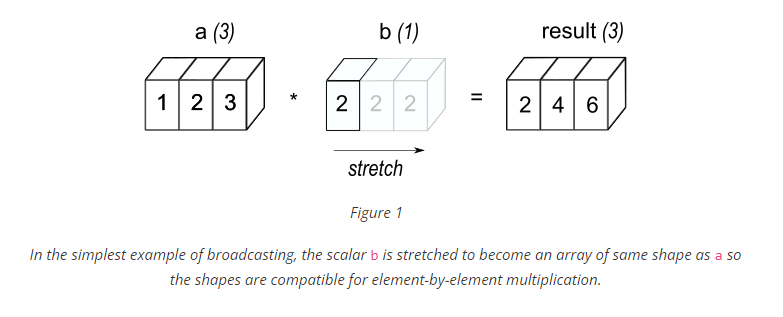

The new elements in b, as shown in the above Figure , are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

In [ ]:
# there is a simple broadcasting occurs when an array and scalr value are combined in an operation
b = 2
a * b

**General Broadcasting rules**

* when operating on two arrays(same or different arrays) numpy compares their shapes element-wise.
* **it starts the trailing(i.e right most) dimension and works its way left.**
* **Two dimensions are compatible when**
    1. **they are equal**
    2. **or one of them is 1**
* if above two conditions doesnot met then we get ValueError indicating that the arrays are not compatible.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. Note that missing dimensions are assumed to have size one.
```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

* **Number of Dimensions:**The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions.
* **Size of Each Dimension:**The size of each dimension in the resulting array will be the largest size of the corresponding dimension among the input arrays.
* **Missing Dimensions:**Missing dimensions in the input arrays are assumed to have size one. Broadcasting will replicate the values along these dimensions to match the size of the corresponding dimension in the other array.

When either of the dimensions compared is one, the other is used. In other words, dimensions with size 1 are stretched or “copied” to match the other.
```
In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

**Broadcastable arrays**

A set of arrays is called “broadcastable” to the same shape if the above rules produce a valid result.

For example, if a.shape is (5,1), b.shape is (1,6), c.shape is (6,) and d.shape is () so that d is a scalar, then a, b, c, and d are all broadcastable to dimension (5,6); and

* a acts like a (5,6) array where a[:,0] is broadcast to the other columns,

* b acts like a (5,6) array where b[0,:] is broadcast to the other rows,

* c acts like a (1,6) array and therefore like a (5,6) array where c[:] is broadcast to every row, and finally,

* d acts like a (5,6) array where the single value is repeated.

Here are some more examples:
```
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```
Here are examples of shapes that do not broadcast:
```
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
```

In [ ]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

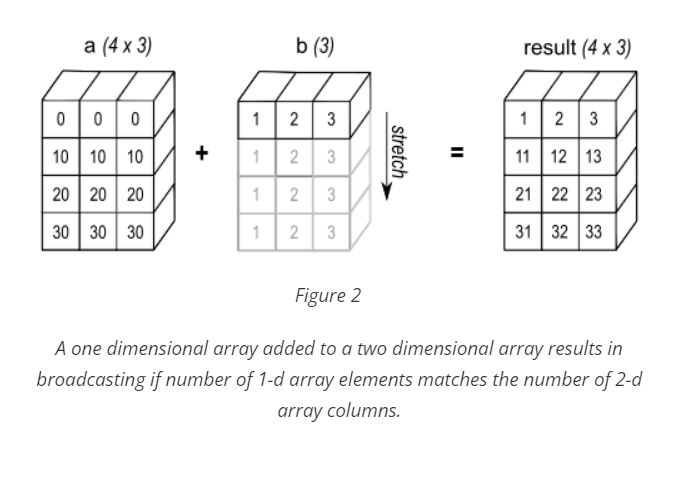

In [ ]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

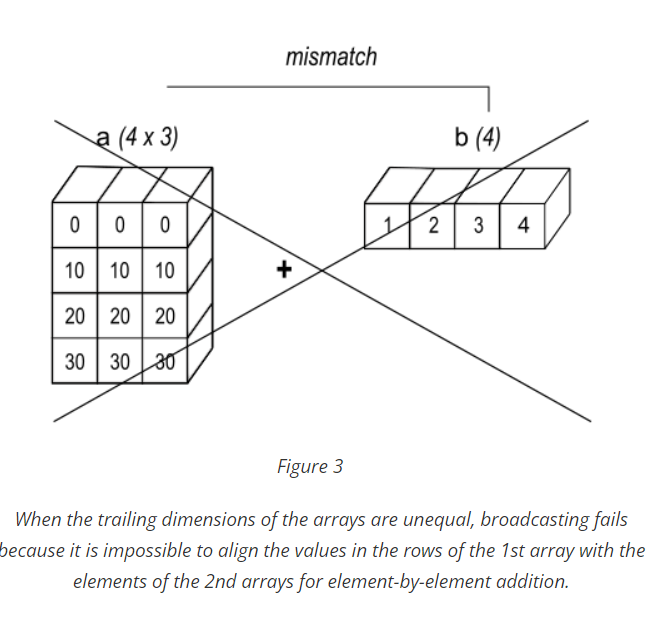

In [ ]:
print(np.newaxis)

In [ ]:
a = np.array([0,10,11,12])

In [ ]:
a,a.dtype,a.shape

newaxis is called as a pseudo index that allows the temporary addition of an axis into a multiarray

In [ ]:
a[:,np.newaxis]

In [ ]:
a[:,np.newaxis].shape

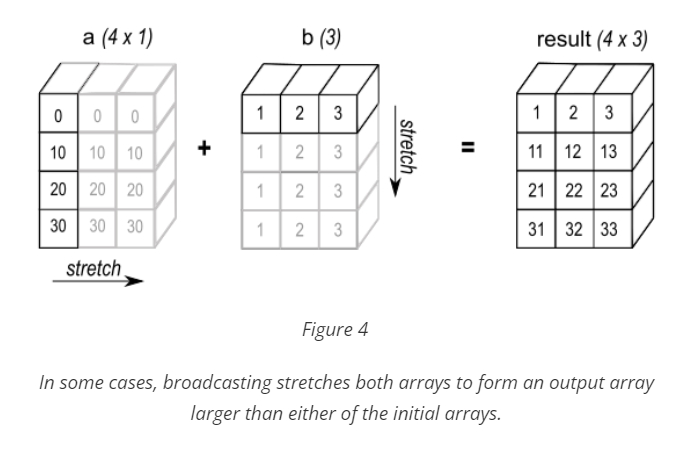

In [ ]:
a[:,np.newaxis]+b

In [ ]:
arr = np.arange(5*5).reshape(5,5)
arr.shape

In [ ]:
arr_5D = arr[np.newaxis, ..., np.newaxis, np.newaxis]    # arr[None, ..., None, None]
arr_5D.shape

In [ ]:
arr_5D = arr[np.newaxis, ..., np.newaxis,...,np.newaxis]    # arr[None, ..., None, None]
arr_5D.shape

**A Practical Example: Vector Quantization**



```
from numpy import array, argmin, sqrt, sum
observation = array([111.0, 188.0])
codes = array([[102.0, 203.0],
               [132.0, 193.0],
               [45.0, 155.0],
               [57.0, 173.0]])
diff = codes - observation    # the broadcast happens here
dist = sqrt(sum(diff**2,axis=-1))
argmin(dist)
```
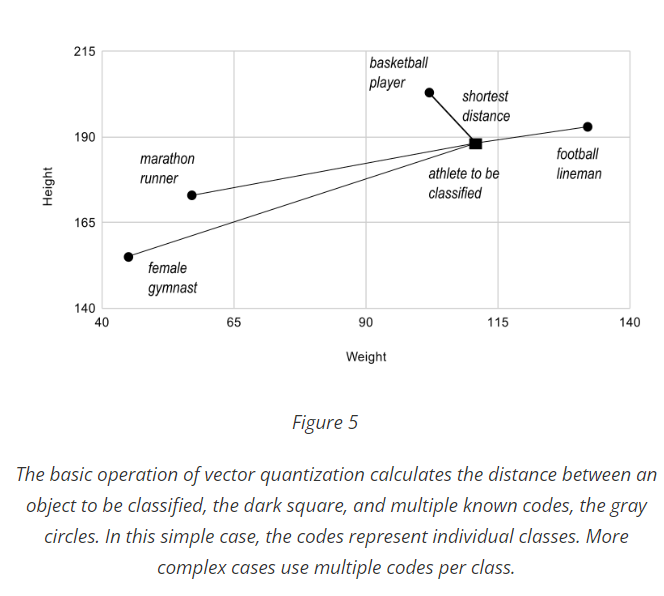


#Basics

In [ ]:
lst = [1,2,3]
arry = np.array(lst)
lst,type(lst),arry,arry.dtype,type(arry)

In [ ]:
print(arry) # see when print arry above and in this when you print with the print(arry)

Note: use [ ] operators inside numpy.array() for multi-dimensional

In [ ]:
print(np.array([10,11,12]))
print()
print(np.array(10,11,12))


* **Axis:** The Axis of an array describes the order of the indexing into the array.
* **Shape:** The number of elements along with each axis. It is from a tuple.
* **Rank:** The rank of an array is simply the number of axes (or dimensions) it has.

* The **Numpy array object** in Numpy is called ndarray. We can create ndarray using `numpy.array()` function.
* `numpy.arange([start, ]stop, [step, ]dtype=None)` that returns evenly spaced values within a given interval.
* `numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)` returns evenly spaced numbers over a specified between two limits.
* `numpy.empty(shape, dtype=float, order=’C’)` create a new array of given shape and type, without initializing value.
* `numpy.ones(shape, dtype=None, order=’C’)` get a new array of given shape and type, filled with ones(1).
* `numpy.zeros(shape, dtype=None)` get a new array of given shape and type, filled with zeros(0).

in C, the data types of each variable are explicitly declared, while in Python the types are dynamically inferred.



```
# Python code
x = 4
x = "four"

/* C code */
int x = 4;
x = "four";  // FAILS
```
 **the fact that Python variables are more than just their value; they also contain extra information about the type of the value**

https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

**A Python Integer Is More Than Just an Integer**

* The standard Python implementation is written in C.
*  For example, when we define an integer in Python, such as x = 10000, x is not just a "raw" integer. It's actually a pointer to a compound C structure, which contains several values. Looking through the Python 3.4 source code, we find that the integer (long) type definition effectively looks like this (once the C macros are expanded):
```
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```


A single integer in Python 3.4 actually contains four pieces:

* ob_refcnt, a reference count that helps Python silently handle memory allocation and deallocation
* ob_type, which encodes the type of the variable
* ob_size, which specifies the size of the following data members
* ob_digit, which contains the actual integer value that we expect the Python variable to represent.

This means that there is some overhead in storing an integer in Python as compared to an integer in a compiled language like C, as illustrated in the following figure:
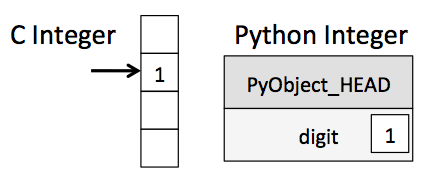

Here PyObject_HEAD is the part of the structure containing the reference count, type code, and other pieces mentioned before.


Notice the difference here: a C integer is essentially a label for a position in memory whose bytes encode an integer value. **A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes that contain the integer value.**This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically. All this additional information in Python types comes at a cost, however, which becomes especially apparent in structures that combine many of these objects.

**Python List Is More Than Just a List**

Let's consider now what happens when we use a Python data structure that holds many Python objects. The standard mutable multi-element container in Python is the list. We can create a list of integers as follows:
```
L = list(range(10))
L # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
type(L[0]) #int
Or, similarly, a list of strings:
L2 = [str(c) for c in L]
L2#['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
type(L2[0])#str
Because of Python's dynamic typing, we can even create heterogeneous lists:

L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]#[bool, str, float, int]
```

But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array. The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:
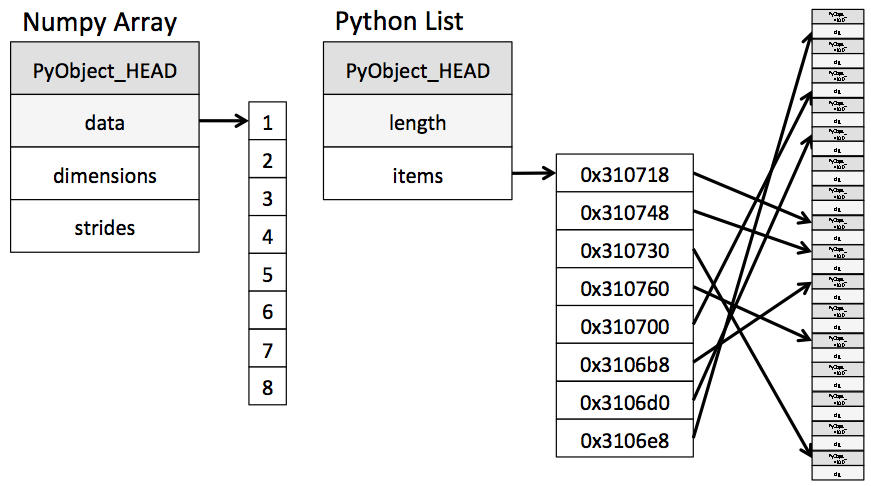
At the implementation level, the array essentially contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier. Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

**Basic array manipulations**



Indexing of arrays: Getting and setting the value of individual array elements


Slicing of arrays: Getting and setting smaller subarrays within a larger array
Reshaping of arrays: Changing the shape of a given array

Joining and splitting of arrays: Combining multiple arrays into one, and splitting one array into many

**Attributes of arrays:** Determining the size, shape, memory consumption, and data types of arrays

seed with a set value in order to ensure that the same random arrays are generated each time this code is run

In [ ]:
np.random.seed(0)
x1 = np.random.randint(10,size=6)
x2 = np.random.randint(10,size=(3,4))
x3 = np.random.randint(10,size=(3,4,5))

In [ ]:
x1,x2,x3

Each array has attributes ndim (the number of dimensions), shape (the size of each dimension), and size (the total size of the array)

In [ ]:
print(x1.ndim, x1.shape, x1.size)
print(x2.ndim, x2.shape, x2.size)
print(x3.ndim, x3.shape, x3.size)

Another useful attribute is the dtype, the data type of the array

In [ ]:
x1.dtype, x2.dtype, x3.dtype

Other attributes include itemsize, which lists the size (in bytes) of each array element, and nbytes, which lists the total size (in bytes) of the array

In [ ]:
x3.itemsize, x3.nbytes

nbytes is equal to itemsize times size.

**Array Indexing: Accessing Single Elements**

In a one-dimensional array, the ith
 value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists

 To index from the end of the array, you can use negative indices

In [ ]:
x1[0],x1[5],x1[-1],x1[-3]

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices

In [ ]:
x2[0,1]

In [ ]:
x2[1,-1]

values can also be modified using any of the above index notation

In [ ]:
x2[0,0]

In [ ]:
x2[0,0]=30
x2

In [ ]:
x2[0,1]

unlike Python lists, NumPy arrays have a fixed type. This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated.

In [ ]:
x2[0,1] = 5.53134
x2[0,1], x2

**Array Slicing: Accessing Subarrays**
`x[start:stop:step]`
default to the values start=0, stop=size of dimension, step=1


In [ ]:
# 1- dim aubarrays
x = np.arange(10)
print(x)
print(x[2]) # accesing paritcular element
print(x[:5]) # first five elements
print(x[5:]) # elements after index 5
print(x[4:7]) # middle sub array
print(x[::2]) # every other element
print(x[::3]) # every third element
print(x[1::2]) # starting from index from 1, every other element

# confusing case is when the step value is negative. In this case, the defaults for start and stop are swapped

print(x[::-1]) # reverse, all elements
print(x[5::-2]) # reversed every other from index 5

In [ ]:
# multi dimensional subarrays
print(x2[:2,:3]) # two rows, three columns
print(x2[:3,::2]) # three rows , every other column
print(x2[::-1,::-1]) #  subarray dimensions can even be reversed together
print(x2[:,0]) # first column
print(x2[0,:]) #first row = x2[0]
print(x2[0])

In [ ]:
x2

**Subarrays as no-copy views**

NumPy array slicing differs from Python list slicing: in lists, slices will be copies.

In [ ]:
lst = [2,3,4,5]
a = lst[3]
print(lst,a)
a=100
print(lst,a)

In [ ]:
x2

In [ ]:
x2_sub = x2[:2, :2]
print(x2_sub)
x2_sub[0, 0] = 99
print(x2_sub)
print(x2)

This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

**Creating copies of arrays**

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the copy() method

In [ ]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)
#If we now modify this subarray, the original array is not touched
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)
print(x2)

**Reshaping of Arrays**


* the size of the initial array must match the size of the reshaped array.
* the reshape method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

In [ ]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

In [ ]:
x = np.array([1, 2, 3])

print(x.reshape((1, 3)))# row vector via reshape
print(x[np.newaxis, :]) #row vector via newaxis
print(x.reshape((3, 1)))# column vector via reshape
print(x[:, np.newaxis]) #column vector via newaxis

**Concatenation of arrays**

np.concatenate, np.vstack, and np.hstack


np.concatenate takes a tuple or list of arrays as its first argument

In [ ]:
# np.concatenate takes a tuple or list of arrays as its first argument
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
print(np.concatenate([x, y]))
#concatenate more than two arrays at once
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

In [ ]:
# also be used for two-dimensional arrays
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
# concatenate along the first axis
print(np.concatenate([grid, grid]))

# concatenate along the second axis (zero-indexed)
print(np.concatenate([grid, grid], axis=1))


* np.vstack (vertical stack)
* np.hstack (horizontal stack)
* np.dstack will stack arrays along the third axis

In [ ]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

In [ ]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

**Splitting of arrays**

np.split, np.hsplit, and np.vsplit

 we can pass a list of indices giving the split points

the entries indicate where along axis the array is split. For example, [2, 3] would, for axis=0, result in

ary[:2]

ary[2:3]

ary[3:]

In [ ]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [2, 3])
print(x1, x2, x3)

In [ ]:
grid = np.arange(20).reshape((4, 5)) # try with range as 16
grid

In [ ]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

In [ ]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

# Computations

The key to making it fast is to use vectorized operations, generally implemented through NumPy's universal functions (ufuncs).

This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays. Ufuncs are extremely flexible – before we saw an operation between a scalar and an array, but we can also operate between two arrays

In [ ]:
np.arange(5) / np.arange(1, 6)

And ufunc operations are not limited to one-dimensional arrays–they can also act on multi-dimensional arrays as well

In [ ]:
x = np.arange(9).reshape((3, 3))
2 ** x

**Note:** Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size. Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression.

**Exploring NumPy's UFuncs**

Ufuncs exist in two flavors: unary ufuncs, which operate on a single input, and binary ufuncs, which operate on two inputs.

In [ ]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)
print(-(0.5*x + 1) ** 2)
print()

In [ ]:
np.add(x, 2) #the + operator is a wrapper for the add function

**Operator	Equivalent ufunc	Description**
```
+	np.add	Addition (e.g., 1 + 1 = 2)
-	np.subtract	Subtraction (e.g., 3 - 2 = 1)
-	np.negative	Unary negation (e.g., -2)
*	np.multiply	Multiplication (e.g., 2 * 3 = 6)
/	np.divide	Division (e.g., 3 / 2 = 1.5)
//	np.floor_divide	Floor division (e.g., 3 // 2 = 1)
**	np.power	Exponentiation (e.g., 2 ** 3 = 8)
%	np.mod	Modulus/remainder (e.g., 9 % 4 = 1)
```
**Absolute value**
```
np.abs(x)
no.absolute(x)
```
**Complex Data** which returns absolute value of magnitude
```
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)
```
**Operator	Equivalent ufunc		Operator	Equivalent ufunc**
```
==	np.equal		!=	np.not_equal
<	np.less		<=	np.less_equal
>	np.greater		>=	np.greater_equal
```
**Operator	Equivalent ufunc		Operator	Equivalent ufunc**
```
&	np.bitwise_and		|	np.bitwise_or
^	np.bitwise_xor		~	np.bitwise_not
```
**Trigonometric functions**
```
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))
```
**Inverse trigonometric fucntions**
```
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))
```
**Exponents and logarithms**
```
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))
```
**Inverse of the exponentials, the logarithms**
```
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))
```
**useful for maintaining precision with very small input**
```
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))
```
* NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more.

**Numpy ufunc features**
* For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be. For all ufuncs, this can be done using the out argument of the function

In [ ]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

If we had instead written y[::2] = 2 ** x, this would have resulted in the creation of a temporary array to hold the results of 2 ** x, followed by a second operation copying those values into the y array. This doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the out argument can be significant.

In [ ]:
x=np.arange(5)
print(x)
y=np.zeros(10)
print(np.power(2,x))
print(np.power(2,x,out=y[::2]))
print(y)

A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling reduce on the add ufunc returns the sum of all elements in the array:

In [ ]:
x = np.arange(1, 6)
print(np.add.reduce(x))
print(np.add(x))


Similarly, calling reduce on the multiply ufunc results in the product of all array elements:

In [ ]:
np.multiply.reduce(x)

to store all the intermediate results of the computation, we can instead use accumulate:

In [ ]:
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

*  compute the outer product of two arrays. It allows you to efficiently calculate the element-wise product of all possible pairs of elements from two vectors or arrays.
* outer function takes advantage of broadcasting to perform the outer product without the need for explicit loops. It automatically handles the necessary replication of values to match the dimensions of the output matrix.

In [ ]:
# see the output after reading if you donot understand then read again
# Define two vectors
vector_a = np.array([1, 2, 3])
vector_b = np.array([4, 5, 6])

# Compute the outer product
outer_product = np.outer(vector_a, vector_b)

print("Vector A:", vector_a)
print("Vector B:", vector_b)
print("\nOuter Product:\n", outer_product)


In [ ]:
# Define a matrix and a vector
matrix_a = np.array([[1, 2], [3, 4]])
vector_b = np.array([5, 6])

# Compute the outer product
outer_product = np.outer(matrix_a, vector_b)

print("Matrix A:\n", matrix_a)
print("Vector B:", vector_b)
print("\nOuter Product:\n", outer_product)


In [ ]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

**Structured arrays**

https://jakevdp.github.io/PythonDataScienceHandbook/02.09-structured-data-numpy.html

In [ ]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

If we look above three arrays we donot know they are related to each other.

It would be related if they are stored in single structure

This can handle by numpy i.e numpy can handle this through structures arrays, which are arrays wiht compound data types.




In [ ]:
x = np.zeros(4,dtype=int)
# this creates simple array

In [ ]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

'U10' translates to "Unicode string of maximum length 10," 'i4' translates to "4-byte (i.e., 32 bit) integer," and 'f8' translates to "8-byte (i.e., 64 bit) float."

Above we created empty array, now we have to fill the array with our lsit of values.


In [ ]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

In [ ]:
# Get all names
data['name']

In [ ]:
# Get first row of data
data[0]

In [ ]:
# Get the name from the last row
data[-1]['name']

In [ ]:
# Get names where age is under 30
data[data['age'] < 30]['name']

Pandas provides a Dataframe object, which is a structure built on NumPy arrays that offers a variety of useful data manipulation functionality similar to what we've shown here, as well as much, much more

In [ ]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

In [ ]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

In [ ]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

In [ ]:
np.dtype('S10,i4,f8')

The first (optional) character is < or >, which means "little endian" or "big endian," respectively, and specifies the ordering convention for significant bits. The next character specifies the type of data: characters, bytes, ints, floating points, and so on (see the table below). The last character or characters represents the size of the object in bytes.

**Character	 Description	 Example**
```
'b'	Byte	np.dtype('b')
'i'	Signed integer	np.dtype('i4') == np.int32
'u'	Unsigned integer	np.dtype('u1') == np.uint8
'f'	Floating point	np.dtype('f8') == np.int64
'c'	Complex floating point	np.dtype('c16') == np.complex128
'S', 'a'	String	np.dtype('S5')
'U'	Unicode string	np.dtype('U') == np.str_
'V'	Raw data (void)	np.dtype('V') == np.void
```

**More Advanced Compound Types**

you can create a type where each element contains an array or matrix of values. Here, we'll create a data type with a mat component consisting of a 3×3
 floating-point matrix

In [ ]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

Now each element in the X array consists of an id and a 3×3 matrix.

Why would you use this rather than a simple multidimensional array, or perhaps a Python dictionary? The reason is that this NumPy dtype directly maps onto a C structure definition, so the buffer containing the array content can be accessed directly within an appropriately written C program. If you find yourself writing a Python interface to a legacy C or Fortran library that manipulates structured data, you'll probably find structured arrays quite useful!

**RecordArrays: Structured Arrays with a Twist**

np.recarray class, which is almost identical to the structured arrays just described, but with one additional feature: fields can be accessed as attributes rather than as dictionary keys.



In [ ]:
data['age']

In [ ]:
data.age

In [ ]:
#If we view our data as a record array instead, we can access this with slightly fewer keystrokes
data_rec = data.view(np.recarray)
data_rec.age
# now we are able to access data_rec.age as attributes before we didnot able to do thsis oe of feature of np.recarray

In [ ]:
#The downside is that for record arrays, there is some extra overhead involved in accessing the fields, even when using the same syntax.
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

#Indexing

Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values.

In [ ]:
#Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

In [ ]:
[x[3], x[7], x[2]]

In [ ]:
ind = [3, 7, 4]
x[ind]

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

In [ ]:
#Fancy indexing also works in multiple dimensions
X = np.arange(12).reshape((3, 4))
X

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

In [ ]:
#if we combine a column vector and a row vector within the indices, we get a two-dimensional result
X[row[:, np.newaxis], col]

fancy indexing that the return value reflects the broadcasted shape of the indices, rather than the shape of the array being indexed.

https://jakevdp.github.io/PythonDataScienceHandbook/index.html


https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html


https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html


https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html

 Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

 NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type.

In [ ]:
x = np.array([1, 2, 3, 4, 5])
print(x < 3)  # less than
print(x > 3)  # greater than
print(x <= 3)  # less than or equal
print(x >= 3)  # greater than or equal
print(x != 3)  # not equal
print(x == 3)  # equal
print((2 * x) == (x ** 2)) #compound expressions
#when you write x < 3, internally NumPy uses np.less(x, 3)


In [ ]:
# how many values less than 6?
np.count_nonzero(x < 6)

In [ ]:
np.sum(x < 6)

In [ ]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

In [ ]:
# are there any values greater than 8?
np.any(x > 8)

In [ ]:
# are there any values less than zero?
np.any(x < 0)

In [ ]:
# are all values less than 10?
np.all(x < 10)

In [ ]:
# are all values equal to 6?
np.all(x == 6)

In [ ]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

The difference is this: and and or gauge the truth or falsehood of entire object, while & and | refer to bits within each object.



When you use and or or, it's equivalent to asking Python to treat the object as a single Boolean entity. In Python, all nonzero integers will evaluate as True.

In [ ]:
print(bool(42), bool(0))
print(bool(42 and 0))
print(bool(42 or 0))

When you use & and | on integers, the expression operates on the bits of the element, applying the and or the or to the individual bits making up the number

In [ ]:
print(bin(42))
print(bin(59))
print(bin(42 & 59))
print(bin(42 | 59))

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where 1 = True and 0 = False, and the result of & and | operates similarly to above

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

Using or on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value

In [ ]:
A or B

Similarly, when doing a Boolean expression on a given array, you should use | or & rather than or or and

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

In [ ]:
(x > 4) and (x < 8)

So remember this: and and or perform a single Boolean evaluation on an entire object, while & and | perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.

np.sort()

np.argsort()

#np.clip()

numpy.clip() function is used to Clip (limit) the values in an array.

Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

```
Syntax : numpy.clip(a, a_min, a_max, out=None)

An array with the elements of a, but where values < a_min are replaced with a_min, and those > a_max with a_max.

Parameters :
a : Array containing elements to clip.
a_min : Minimum value.
    –> If None, clipping is not performed on lower interval edge. Not more than one of a_min and a_max may be None.
a_max : Maximum value.
    –> If None, clipping is not performed on upper interval edge. Not more than one of a_min and a_max may be None.
    –> If a_min or a_max are array_like, then the three arrays will be broadcasted to match their shapes.
out : Results will be placed in this array. It may be the input array for in-place clipping. out must be of the right shape to hold the output. Its type is preserved.
```

In [ ]:
import numpy as np
a = np.arange(10)
print(a)

#the values in the array a between the minimum value of 1 and the maximum value of 8. Any values less than 1 will be set to 1, and any values greater than 8 will be set to 8.
print(np.clip(a, 1, 8))

#the specified minimum (8) is greater than the specified maximum (1). In this case, it will clip all values to the maximum, which is 1. T
print(np.clip(a, 8, 1))

#This uses the out parameter to perform the clipping in-place on the original array a. The values less than 3 are set to 3, and values greater than 6 are set to 6.
print(np.clip(a, 3, 6, out=a))

a = np.arange(10)
print(np.clip(a, [3, 4, 1, 1, 1, 4, 4, 4, 4, 4], 8))
#                 0  1  2  3  4  5  6  7  8  9

Certainly! Let's dive into more detail about the line print(np.clip(a, [3, 4, 1, 1, 1, 4, 4, 4, 4, 4], 8).

The np.clip() function is used to limit the values in an array to a specified range. In this case, three parameters are provided:

* a: The array to be clipped, which is a = np.arange(10) in this example.
* [3, 4, 1, 1, 1, 4, 4, 4, 4, 4]: This is an array specifying the minimum values for each corresponding element in a. If the value in a is less than the corresponding value in this array, it will be set to that minimum value.
* 8: This is the maximum value. If any value in a is greater than this, it will be set to 8.

Let's break down the operation for each element:
* a[0]: Minimum specified is 3, so the clipped value is the maximum between 3 and a[0] (0), which is 3.
* a[1]: Minimum specified is 4, so the clipped value is the maximum between 4 and a[1] (1), which is 4.
* a[2]: Minimum specified is 1, so the clipped value is the maximum between 1 and a[2] (2), which is 2.
* a[3]: Minimum specified is 1, so the clipped value is the maximum between 1 and a[3] (3), which is 3.
* a[4]: Minimum specified is 1, so the clipped value is the maximum between 1 and a[4] (4), which is 4.
* a[5]: Minimum specified is 4, so the clipped value is the maximum between 4 and a[5] (5), which is 5.
* a[6]: Minimum specified is 4, so the clipped value is the maximum between 4 and a[6] (6), which is 6.
* a[7]: Minimum specified is 4, so the clipped value is the maximum between 4 and a[7] (7), which is 7.
* a[8]: Minimum specified is 4, so the clipped value is the maximum between 4 and a[8] (8), which is 8.
* a[9]: Minimum specified is 4, so the clipped value is the maximum between 4 and a[9] (9), which is 9.